In [1]:
# SVM_Demo
# Referenced from : https://www.mltut.com/svm-implementation-in-python-from-scratch/
# Data from : https ://www.kaggle.com/rakeshrau/social-network-ads

import numpy as np # data manipulation
import matplotlib.pyplot as plt # used for drawing graphs
import pandas as pd # used to load and manipulate data

In [2]:
# importing the data that will be used for this SVM

dataset = pd.read_csv("Social_Network_Ads.csv")

#Splitting independent variables Age and Estimated Salary into variable X
#Splitting dependent variable purchased into variable y

X = dataset.iloc[:, [2, 3]].values
y = dataset.iloc[:, 4].values

In [3]:
# utilizing train_test_split from sklearn library to train and test the model

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)


#now to peform feature scaling, which is used to help normalize the data within a certain range, to decrease computation time
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [4]:
# now importing and setting up the Support Vector Classifier

#importing the SVC method from sklearn and utilizing a radial binary function kernel since it will provide better results
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_train, y_train)

# now to predict depedent variables (y) utilizing X_test and the SVC
y_pred = classifier.predict(X_test)

In [5]:
# implenting the confusion matrix, used to determine how many values are predicited correctly and incorrectly

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


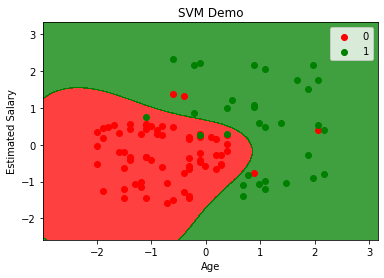

In [6]:
# outputting results

from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('SVM Demo')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

In [7]:
# outputting accuracy results of the SVM using the confusion matrix
print(cm)
accuracy_score(y_test,y_pred)

[[64  4]
 [ 3 29]]


0.93

In [8]:
# now to output the results of the prediction to determine the accuracy of SVM

from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

# precision measures the classifiers "exactness", meaning its defined by its ratio of true positives to false positives

# recall is the measure of the classifiers "completeness" meaning its defined by the ratio of true positives to the sum of true
# positives and false negatives

# in the following results, 0 (did not purchase) has an f1 score of 95%, while 1 (did purchase) has an f1 score of 89%
# F1 score is a measure of a tests accuracy, which is the harmonic mean of precision and recall stats

# support is the number of actual occurances of the class in the dataset. The support does not change between models but it 
# diagnoses the evaluation process

# accuracy is an average between the two f1 scores

              precision    recall  f1-score   support

           0       0.96      0.94      0.95        68
           1       0.88      0.91      0.89        32

    accuracy                           0.93       100
   macro avg       0.92      0.92      0.92       100
weighted avg       0.93      0.93      0.93       100



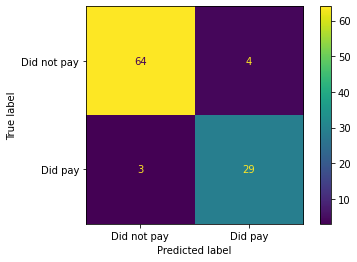

In [9]:
from sklearn.metrics import plot_confusion_matrix # draws the confusion matrix
plot_confusion_matrix(classifier, X_test, y_test, values_format='d', display_labels=["Did not pay", "Did pay"])

# the data below shows that 64/68 of the did not pay results were correctly identfied, 
# and 29/32 of the did pay was correctly classfied